## Содержание проекта

1. Описание проекта;
2. Цель исследования;
3. Описание данных;
4. Схема данных;
5. Задания;
6. Импорт библиотек и подключение к базе данных;
7. Изучение данных;
8. Исследовательский анализ: выполнение SQL-запросов для решения заданий;
9. Выводы.

## Описание проекта 

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Компания, в которой я работаю аналитиком, решила быть на волне и купила крупный сервис для чтения книг по подписке. Моя первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг.

## Цель исследования

На основе проанализированных данных сформулировать ценностное предложение для нового продукта.

## Описание данных

**Таблица** `books` cодержит данные о книгах:
- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.

**Таблица** `authors` содержит данные об авторах:
- author_id — идентификатор автора;
- author — имя автора.

**Таблица** `publishers` cодержит данные об издательствах:
- publisher_id — идентификатор издательства;
- publisher — название издательства;

**Таблица** `ratings` содержит данные о пользовательских оценках книг:
- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.

**Таблица** `reviews` содержит данные о пользовательских обзорах на книги:
- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя пользователя, написавшего обзор;
- text — текст обзора.

## Схема данных

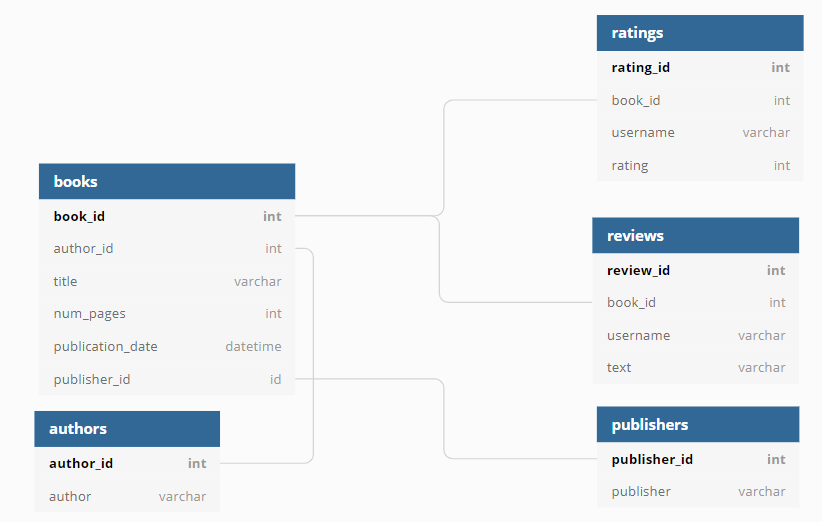

## Задания

1. Посчитать, сколько книг вышло после 1 января 2000 года;
2. Для каждой книги посчитать количество обзоров и среднюю оценку;
3. Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры;
4. Определить автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками;
5. Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

## Импорт библиотек и подключение к базе данных

### 1. Импорт библиотек

In [1]:
import psycopg2 as ps
import pandas as pd
from sqlalchemy import text, create_engine

### 2. Подключение к базе данных

In [2]:
db_config = {'user': 'praktikum_student', #имя пользователя
            'pwd':'Sdf4$2;d-d30pp', #пароль
            'host':'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port':6432, #порт подключения
            'db':'data-analyst-final-project-db'} #название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

#сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

con=engine.connect()

## Изучение данных

In [3]:
#чтобы выполнить SQL-запрос, используем Pandas
books = '''SELECT * FROM books LIMIT 5'''
pd.io.sql.read_sql(sql=text(books), con=con)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
authors = '''SELECT * FROM authors LIMIT 5'''
pd.io.sql.read_sql(sql=text(authors), con=con)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [5]:
publishers = '''SELECT * FROM publishers LIMIT 5'''
pd.io.sql.read_sql(sql=text(publishers), con=con)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [6]:
ratings = '''SELECT * FROM ratings LIMIT 5'''
pd.io.sql.read_sql(sql=text(ratings), con=con)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [7]:
reviews = '''SELECT * FROM reviews LIMIT 5'''
pd.io.sql.read_sql(sql=text(reviews), con=con)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [8]:
#проверим количество обзоров в таблице reviews
count_review = '''
SELECT COUNT(review_id)
FROM reviews
'''
pd.io.sql.read_sql(sql=text(count_review), con=con)

,count
0,2793


In [9]:
#проверим количество оценок в таблице ratings
count_ratingid = '''
SELECT COUNT(rating_id)
FROM ratings
'''
pd.io.sql.read_sql(sql=text(count_ratingid), con=con)

,count
0,6456


In [10]:
#проверим, сколько всего книг в нашей таблице books
count_books = '''
SELECT COUNT(book_id)
FROM books
'''
pd.io.sql.read_sql(sql=text(count_books), con=con)

,count
0,1000


## Исследовательский анализ: выполнение SQL-запросов для решения заданий

#### 1. Считаем, сколько книг вышло после 1 января 2000 года.

In [11]:
books_count = '''SELECT COUNT(book_id) 
                 FROM books 
                 WHERE publication_date::date > '2000-01-01'
                 '''
pd.io.sql.read_sql(sql=text(books_count), con=con)

,count
0,819


После 1 января 2000 года вышло 819 книг.

#### 2. Для каждой книги считаем количество обзоров и среднюю оценку.

In [18]:
books_reviews_rate = '''SELECT b.book_id,
                               b.title,
                               ROUND(AVG(ra.rating),2) AS avg_rating,
                               COUNT(DISTINCT r.review_id) AS review_count
                 FROM books AS b
                 LEFT JOIN reviews AS r ON r.book_id=b.book_id
                 LEFT JOIN ratings AS ra ON ra.book_id=b.book_id
                 GROUP BY b.book_id
                 ORDER BY COUNT(r.review_id) DESC
                 '''
pd.io.sql.read_sql(sql=text(books_reviews_rate), con=con)

,book_id,title,avg_rating,review_count
0,948,Twilight (Twilight #1),3.66,7
1,750,The Hobbit or There and Back Again,4.13,6
2,673,The Catcher in the Rye,3.83,6
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,4.41,6
4,299,Harry Potter and the Chamber of Secrets (Harry...,4.29,6
...,...,...,...,...
995,221,Essential Tales and Poems,4.00,0
996,387,Leonardo's Notebooks,4.00,0
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,5.00,0
998,83,Anne Rice's The Vampire Lestat: A Graphic Novel,3.67,0


Определили для каждой книги количество обзоров и среднюю оценку. 

Можно заметить, что самое большое количество обзоров у книги "Twilight" - 1120 обзоров, при этом рейтинг всего 3.66. 

В сервисе есть и книги, у которых обзоров нет совсем, но при этом выставлена оценка.

Книги оцениваются на платформе по пятибалльной шкале. Максимальная оценка составляет 5.00.

#### 3. Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры.

In [13]:
publisher = '''SELECT p.publisher,
                      COUNT(b.book_id) AS books_count
                 FROM publishers AS p
                 JOIN books AS b ON b.publisher_id=p.publisher_id
                 WHERE b.num_pages > 50
                 GROUP BY p.publisher
                 ORDER BY books_count DESC
                 LIMIT 1
                 '''
pd.io.sql.read_sql(sql=text(publisher), con=con)

,publisher,books_count
0,Penguin Books,42


Наибольшее число книг толще 50 страниц выпустило издательство "Penguin Books" - 42 книги.

#### 4. Определить автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками.

In [14]:
author = '''SELECT a.author,
                   ROUND(AVG(i.rating),2) AS avg_rate
                 FROM (
                 SELECT book_id, 
                        AVG(rating) AS rating
                 FROM ratings
                 GROUP BY book_id
                 HAVING COUNT(*) > 50) AS i
                 JOIN books AS b ON b.book_id=i.book_id
                 JOIN authors AS a ON a.author_id=b.author_id
                 GROUP BY a.author
                 ORDER BY avg_rate DESC
                 LIMIT 1
                 '''
pd.io.sql.read_sql(sql=text(author), con=con)

,author,avg_rate
0,J.K. Rowling/Mary GrandPré,4.28


Автором с самой высокой средней оценкой книг, у которых более 50 оценок, является J.K. Rowling/Mary GrandPré - средняя оценка книг составляет 4.28.

#### 5. Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [15]:
publisher_avg = '''
                        SELECT ROUND(AVG(review.review_cnt), 0) AS avg_review
                        FROM
                            (SELECT COUNT(review_id) AS review_cnt
                        FROM reviews
                        WHERE username
                        IN 
                            (SELECT username
                        FROM
                            ratings
                        GROUP BY
                            username
                        HAVING
                        COUNT(ratings) > 48)
                        GROUP BY 
                            username) 
                        AS
                        review;
                     '''
pd.io.sql.read_sql(sql=text(publisher_avg), con=con)

,avg_review
0,24.0


Пользователи оставившие более 48 оценок в среднем написали 24 обзора.

**Выводы:**
1. Мы исследовали таблицы в базе данных крупного сервиса для чтения книг по подписке. Были проанализированы следующие таблицы:
- books (информация о книгах);
- authors (информация об авторах);
- publishers (данные об издательствах);
- ratings (данные о пользовательских оценках книг);
- reviews (данные о пользовательских обзорах на книги).
2. После 1 января 2000 года вышло 819 книг.
3. Определили для каждой книги количество обзоров и среднюю оценку. 
- самое большое количество обзоров у книги "Twilight" - 1120 обзоров, при этом рейтинг всего 3.66;
- в сервисе есть и книги, у которых обзоров нет совсем, но при этом выставлена оценка;
- книги оцениваются на платформе по пятибалльной шкале;
- максимальная оценка составляет 5.00.
4. Наибольшее число книг толще 50 страниц выпустило издательство "Penguin Books" - 42 книги.
5. Автором с самой высокой средней оценкой книг, у которых более 50 оценок, является J.K. Rowling/Mary GrandPré - средняя оценка книг составляет 4.28.
6. Пользователи оставившие более 48 оценок в среднем написали 24 обзора.

В рамках развития нового продукта рекомендуется сосредоточиться на продаже бестселлеров. У пользователей должна быть возможность читать онлайн самые популярные произведения, а также произведения с самой высокой оценкой. 

Можно настроить рекомендательную систему для показа пользователям произведений, которые могут их заинтересовать. Рекомендательная система может быть выстроена на основе предпочтений самого пользователя (его оценок, прочитанных произведений в конкретном жанре), а также на основе данных других пользователей, предпочтения которых совпадают. 